In [1]:
import sys 
sys.path.insert(1, '../')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from tqdm import tqdm
import pylab as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from DataAnalyzers.PeaksAnalyzer import calc_Fourier_coeff_for_transient, calc_peacks
from DataContainers.Experiment import Experiment
from Drawing.DrawHelper import set_defaults_1D
from Drawing.DrawTransient1d import draw_amps_stat, draw_transient, draw_timeline_deltas,draw_few_Fouriers
from DataContainers.Experiment import Experiment
from DataAnalyzers.CheckResultsHelper import check_robustness

In [4]:
plt.style.use('classic')
set_defaults_1D()

In [5]:
base_dir = 'D:/math/13.01.2021'

In [6]:
def load_folder_except(folder, exception, take=25):
    res = []
    q = round(float(folder.split('_')[1]),2)
    subdir = f'{base_dir}/{folder}'
    for ex in os.listdir(subdir)[:take]:
        if exception in ex:
            continue
        e = Experiment()
        e.fill_from_file(f'{subdir}/{ex}',load_timelines=True)
        res.append(e)
    return (q, res)

In [8]:
res_soft = [load_folder_except(f, 'rand') for f in tqdm(os.listdir(base_dir)) if f != 'pics']


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [17:33<00:00, 105.33s/it]


### Заходы на паттерн

In [12]:
amps = {}
for q, exs in res_soft:
    amps[q] = []
    for e in exs:
        trans = np.apply_along_axis(lambda x: x.max() - x.min(), 1, e.timelines['u'])
        amps[q].append((trans, tuple(calc_peacks(e.end_values['v']).values())))

In [41]:
def draw_amps_timelines(amps_, t_max = None, legend = True):
    for key in amps_:
        indices = {}
        fig, ax = plt.subplots() 
        for tr, end_patt in amps_[key]:
            if t_max:
                tr = tr[:t_max]
            color_already_used = True
            if end_patt not in indices:
                color_already_used = False
                indices[end_patt] = len(indices)
            color = sns.color_palette('nipy_spectral_r',20)[indices[end_patt]]
            if not color_already_used:
                ax.plot(tr,lw=3,label=str(end_patt),c=color)
            else:
                ax.plot(tr,lw=3,c=color)
        ax.set_title(f'q = {key}')
        ax.set_xlabel('Число шагов по времени')    
        ax.set_ylabel('Амплитуда')
        ax.grid(True)
        if legend:
            plt.legend(loc='lower right')
        plt.show()

def draw_top_n(q, n, folder, amps_):
    q_trans = [x[0].max() for x in amps[q] if x[1][0]]
    q_trans = [(x,i) for i, x in enumerate(q_trans)]
    q_trans = sorted(q_trans, key=lambda x: x[0])
    q_trans = q_trans[-n:][::-1]
    exs = os.listdir(folder)
    for maxx, num in q_trans:
        ex = Experiment()
        ex.fill_from_file(f'{folder}/{exs[num]}', load_timelines=True)
        ax = plt.gca()
        ax.plot(np.apply_along_axis(lambda x: x.max() - x.min(), 1, ex.timelines['u']))
        ax.set_xlabel('Шаги по времени')
        ax.set_ylabel('Амплитуда')
        plt.show()
        draw_transient(ex)
        plt.show()

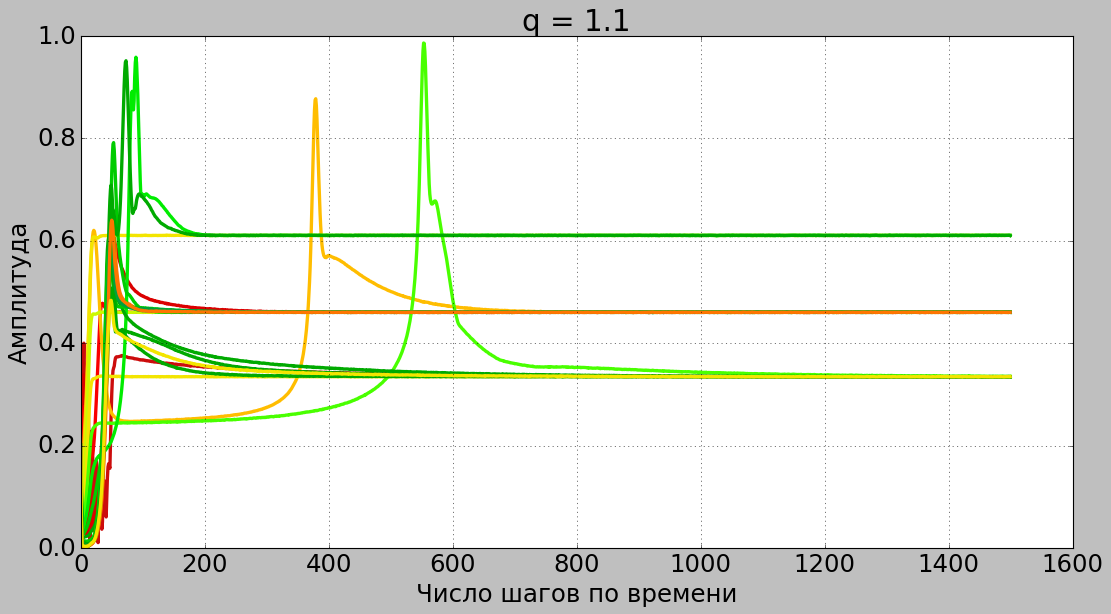

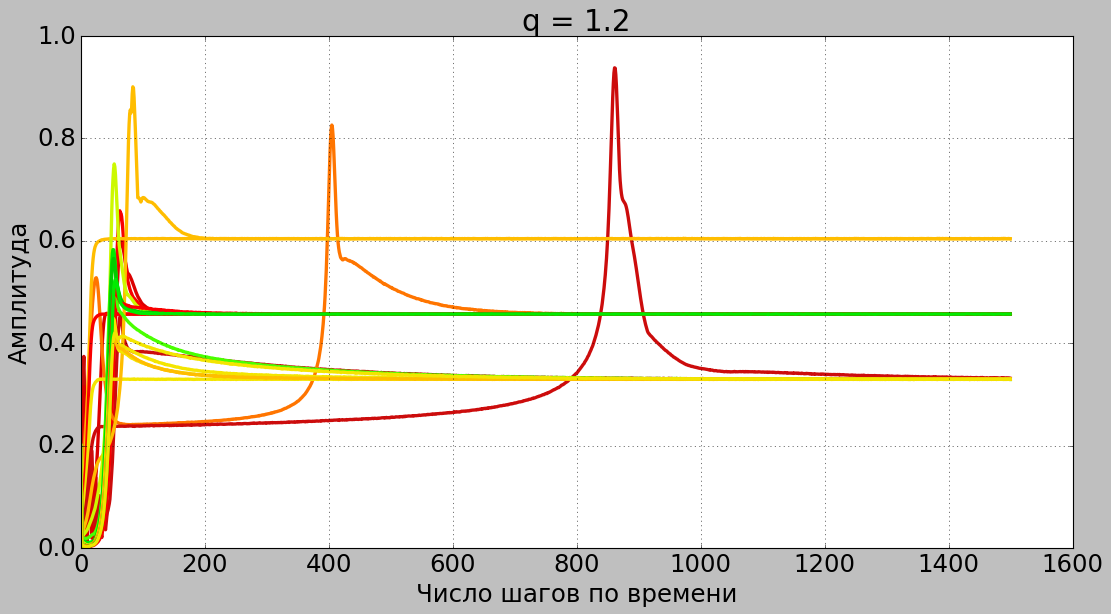

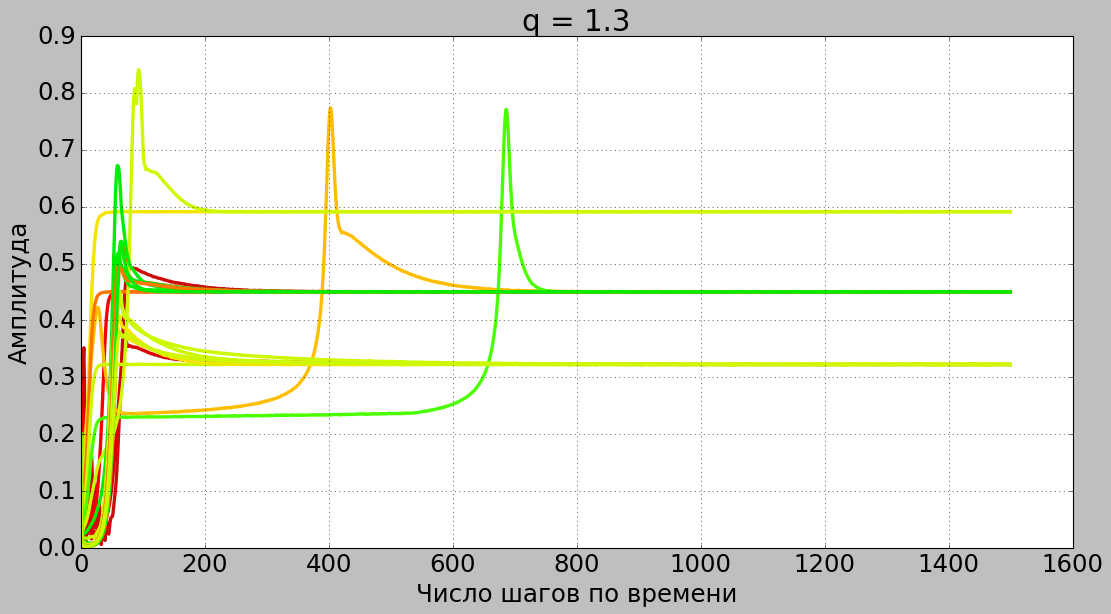

 10%|███████▉                                                                       | 1/10 [29:45<4:27:46, 1785.21s/it]


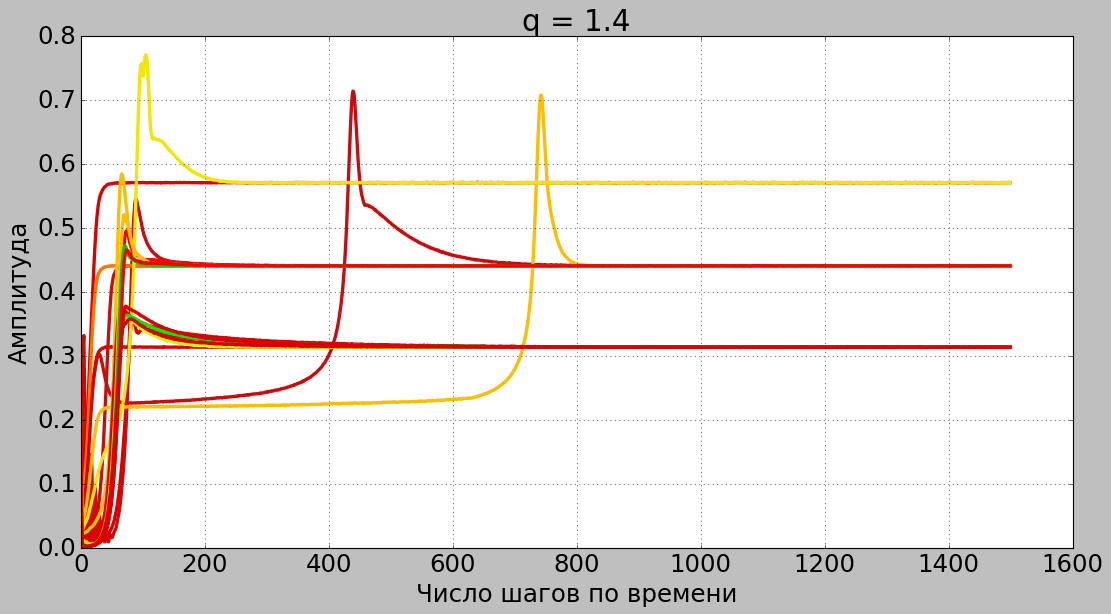

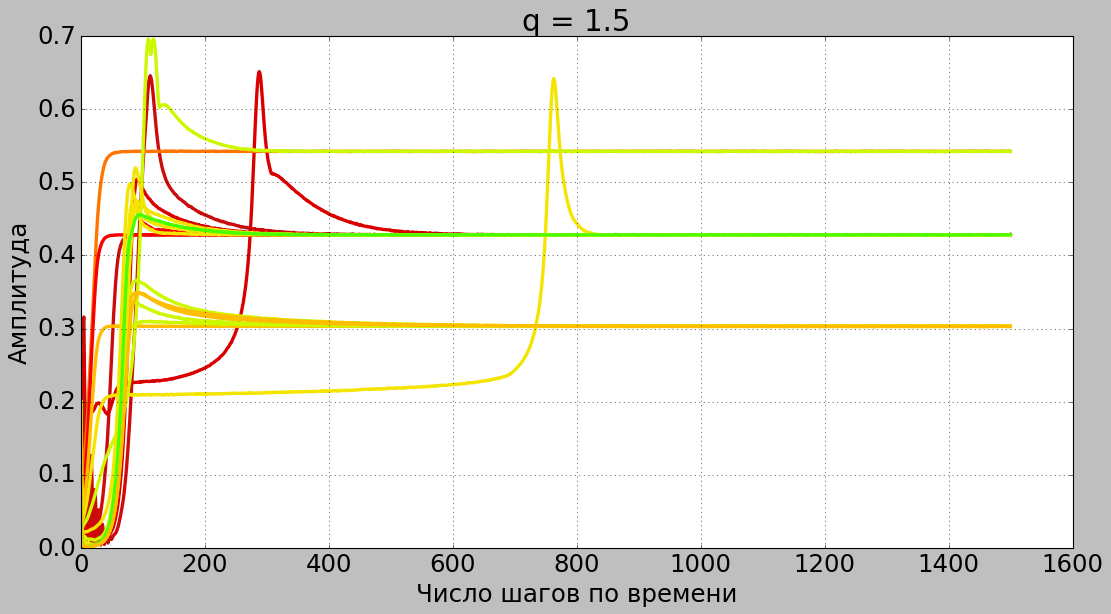

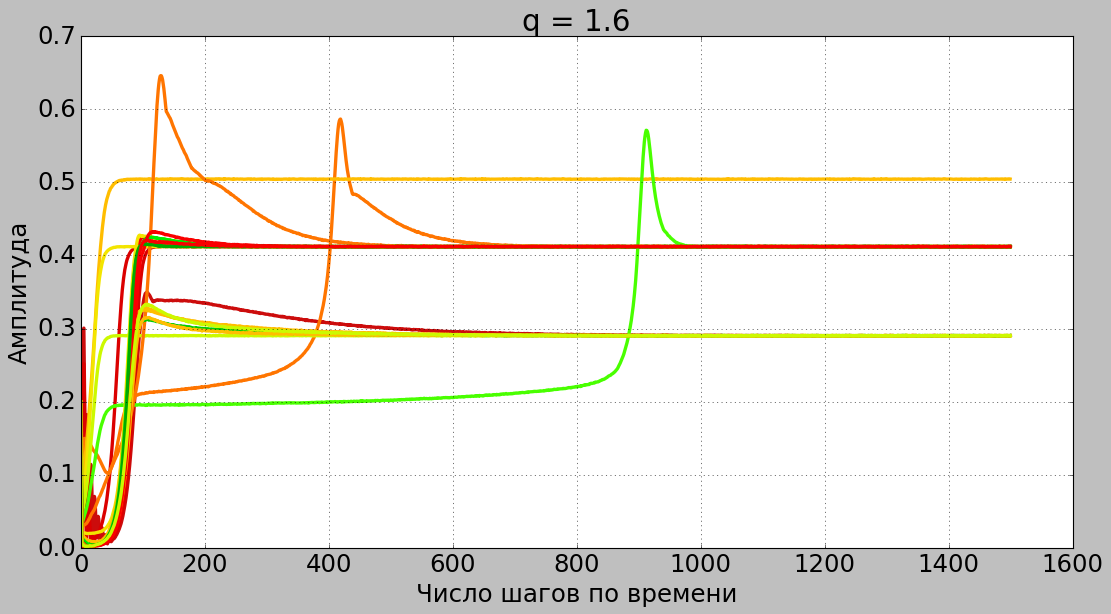

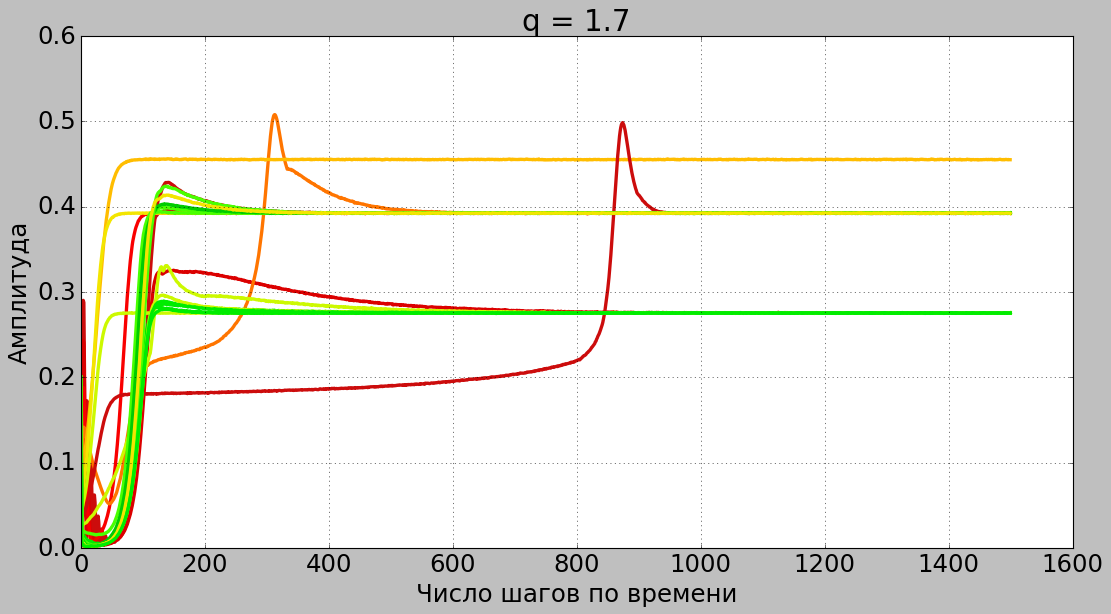

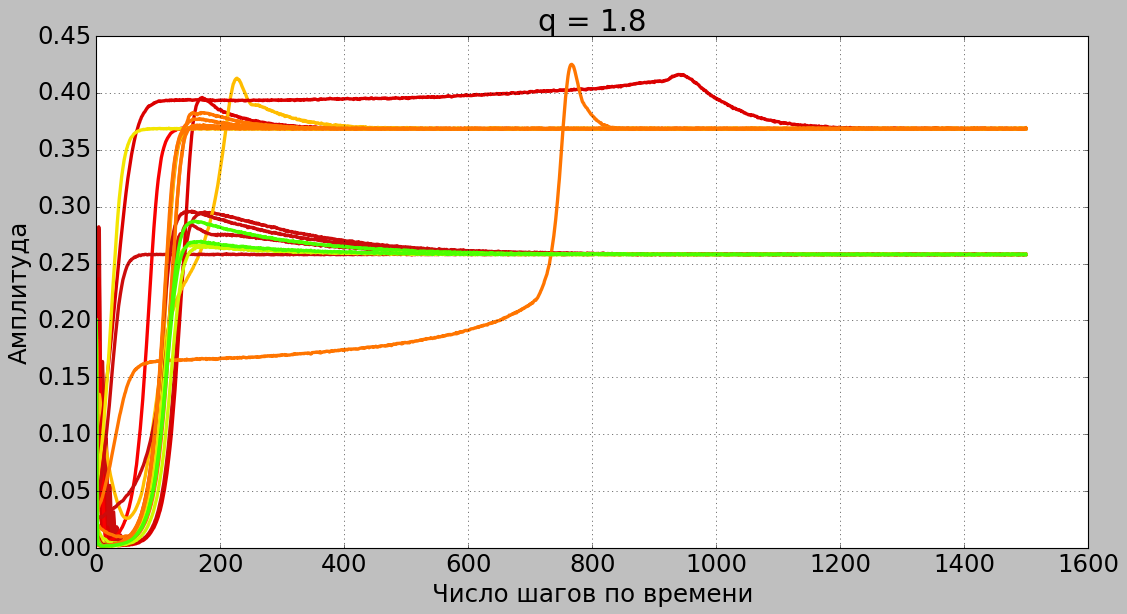

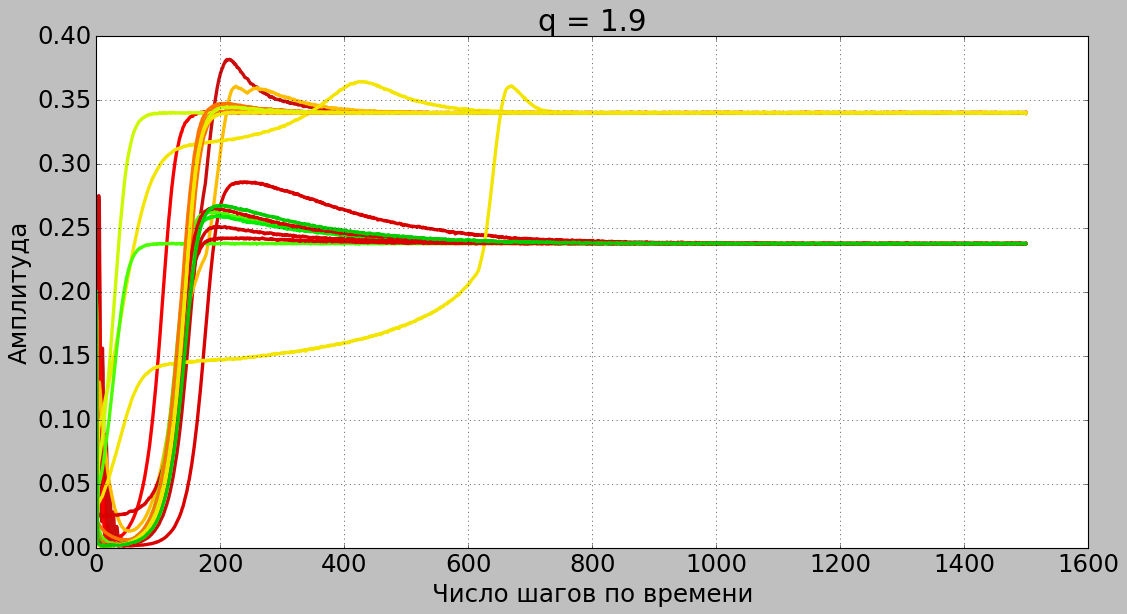

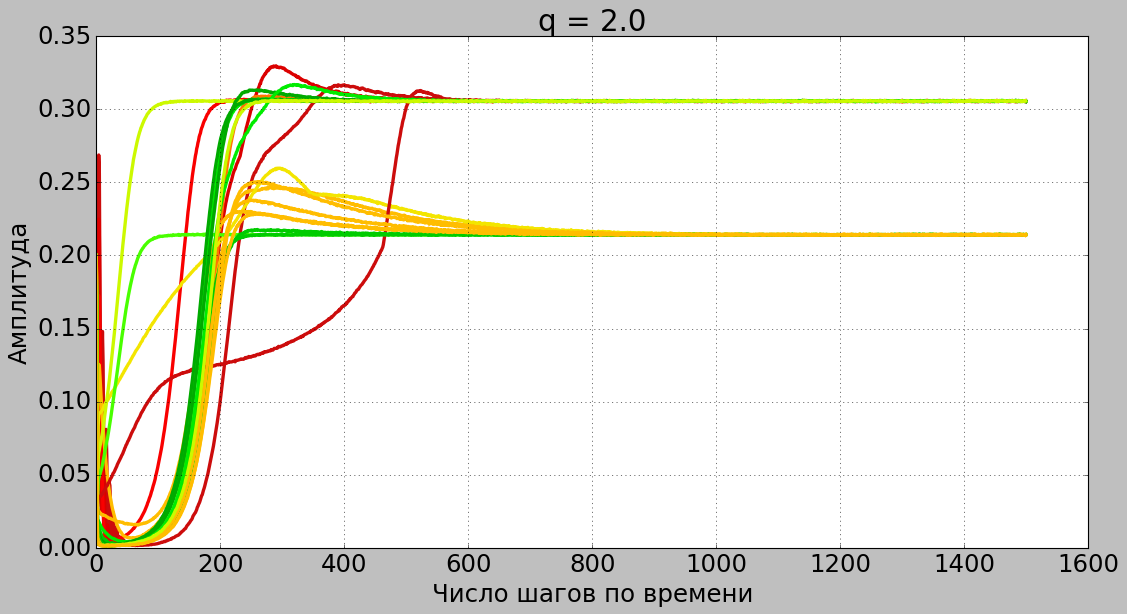

In [53]:
draw_amps_timelines(amps,legend=False,t_max=1500)

In [54]:
base_dir = 'D:/math/12.01.2021'

In [55]:
res_soft_rand = [load_folder_except(f, 'peaks', take=30) for f in tqdm(os.listdir(base_dir)) if f != 'pics']  

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [15:39<00:00, 93.96s/it]


In [56]:
amps_rand = {}
for q, exs in res_soft_rand:
    amps_rand[q] = []
    for e in exs:
        trans = np.apply_along_axis(lambda x: x.max() - x.min(), 1, e.timelines['u'])
        amps_rand[q].append((trans, tuple(calc_peacks(e.end_values['v']).values())))

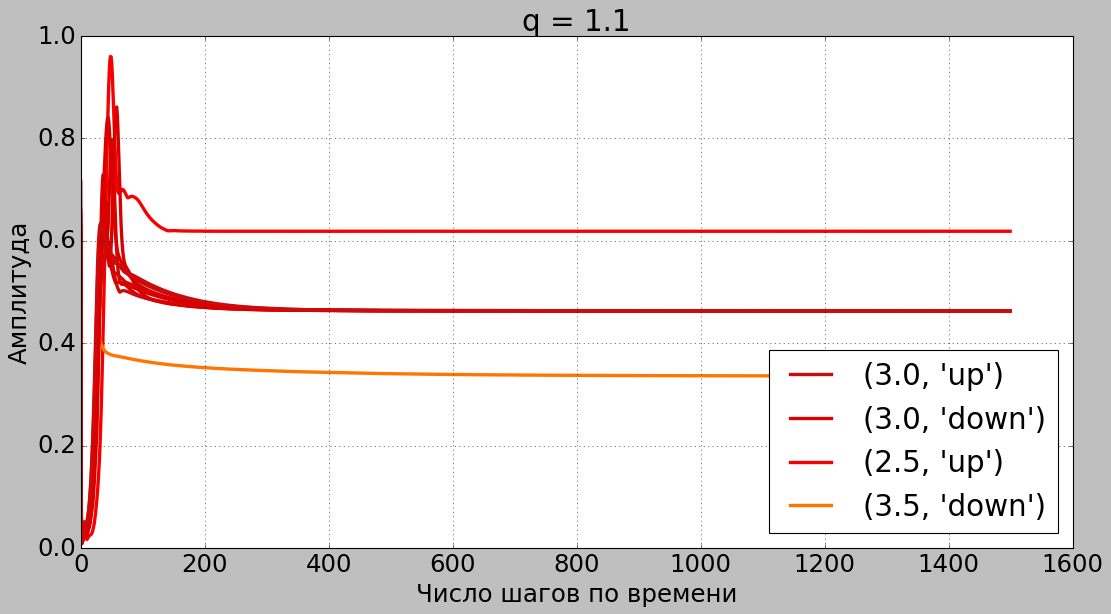

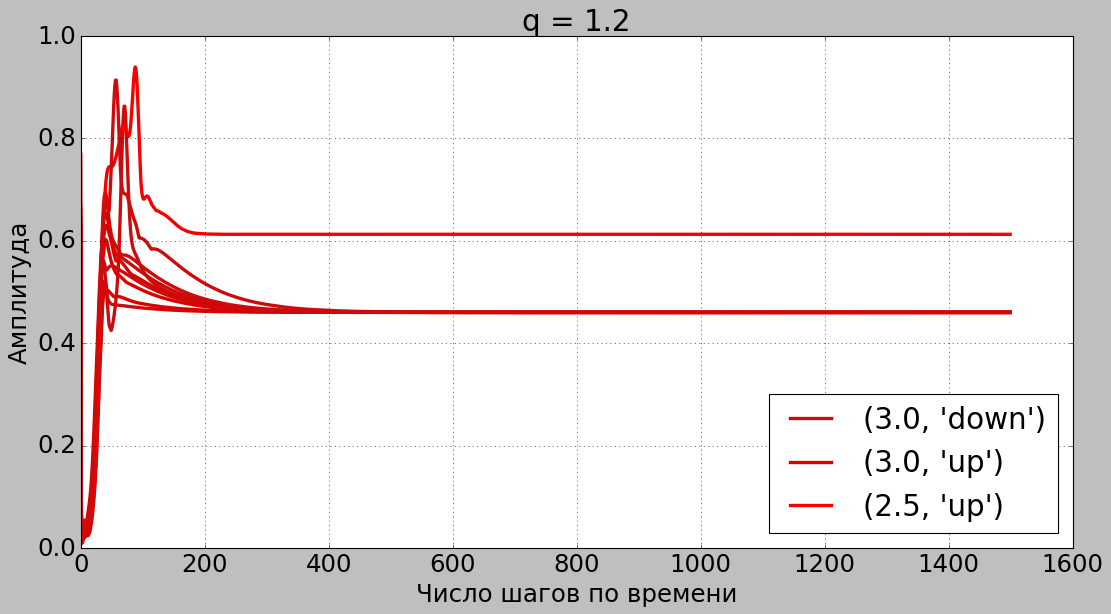

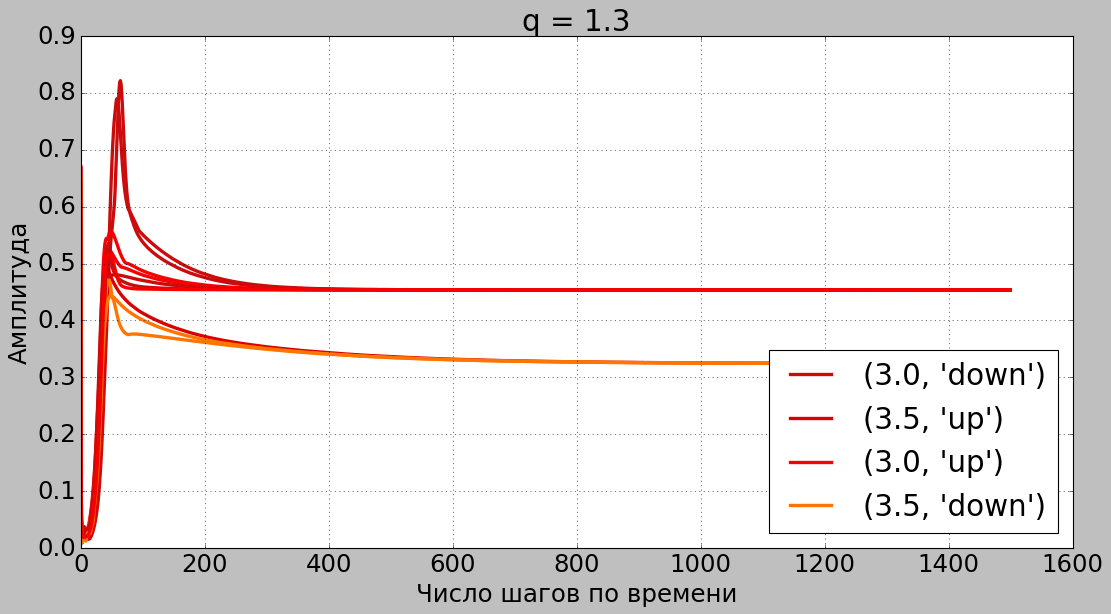

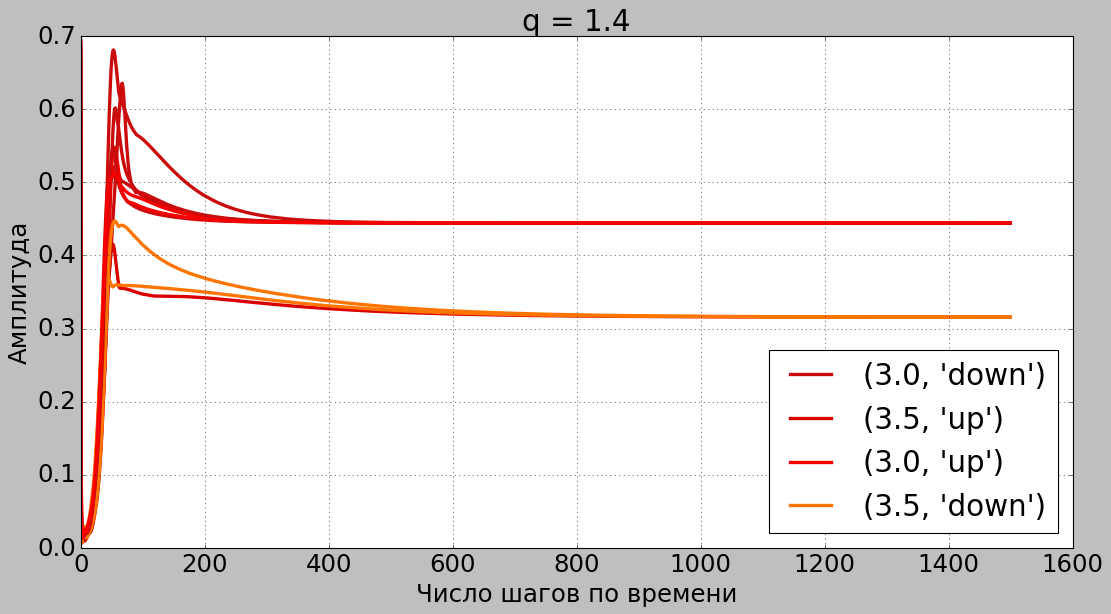

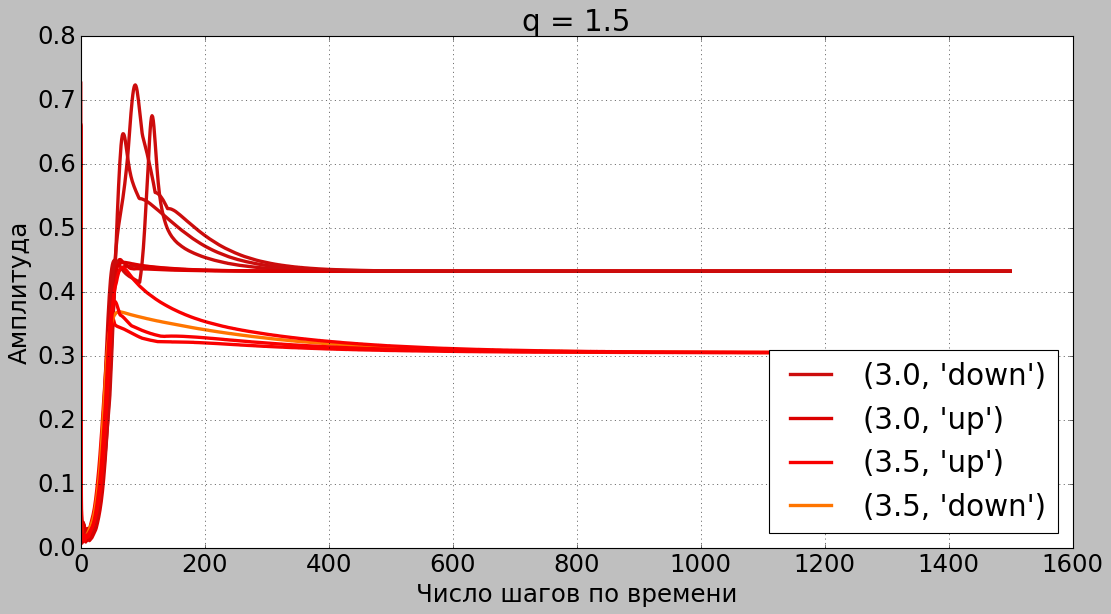

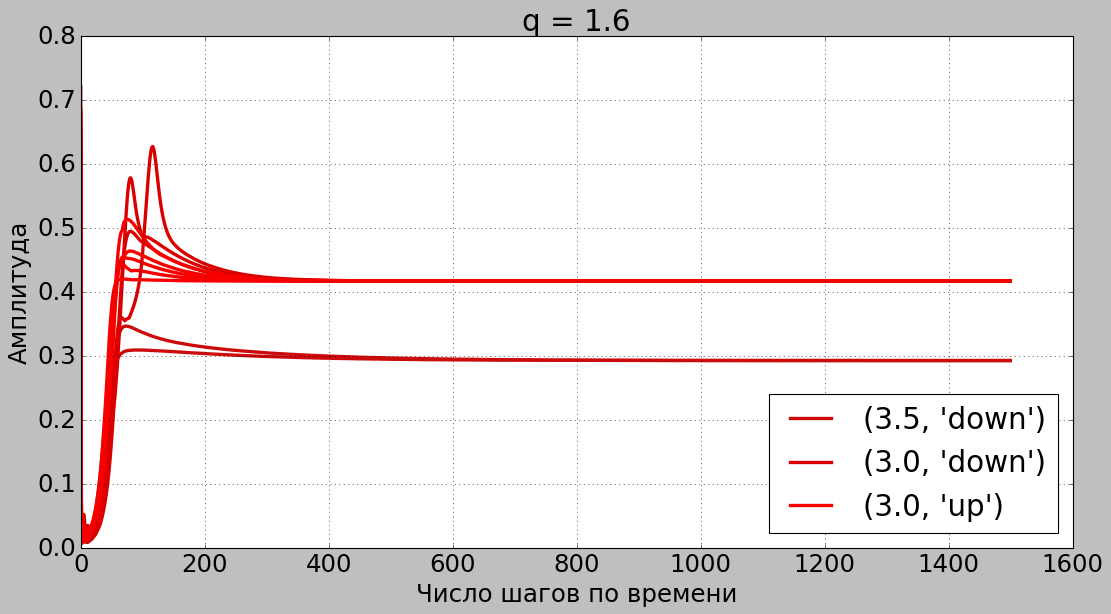

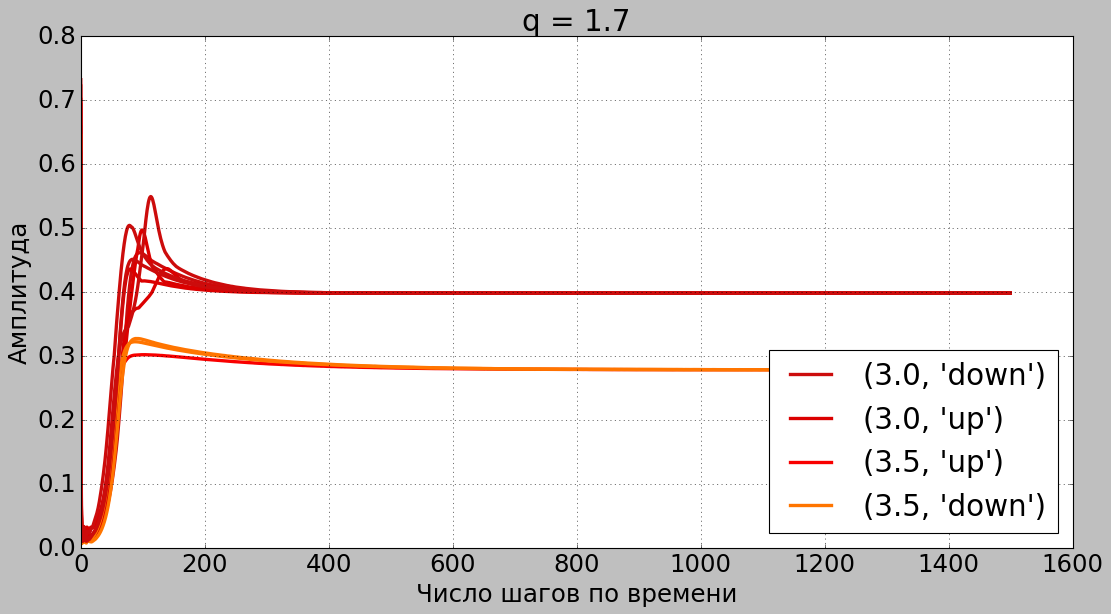

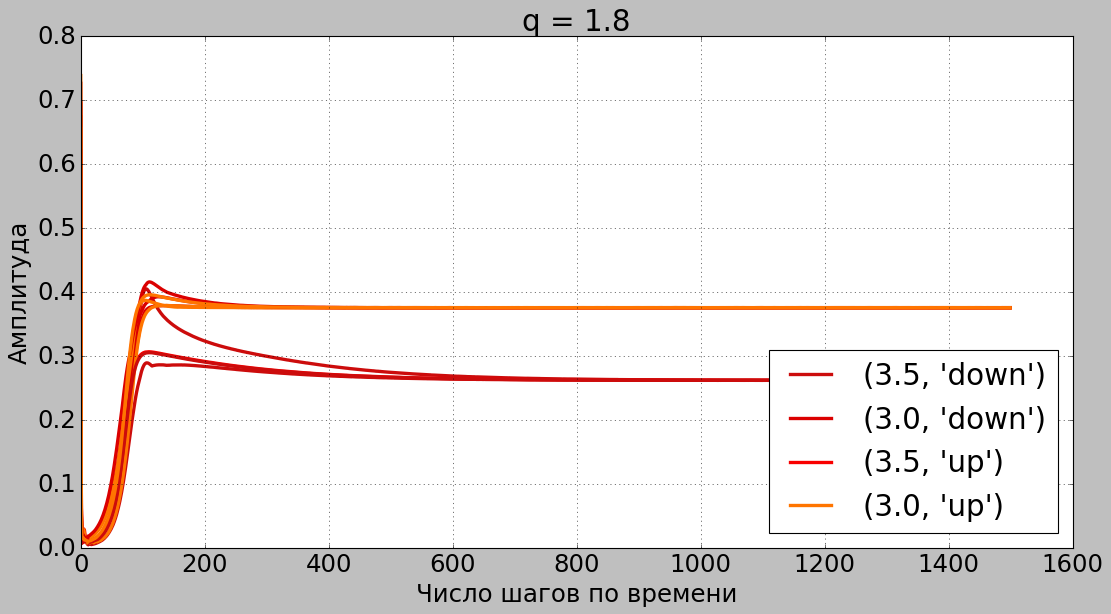

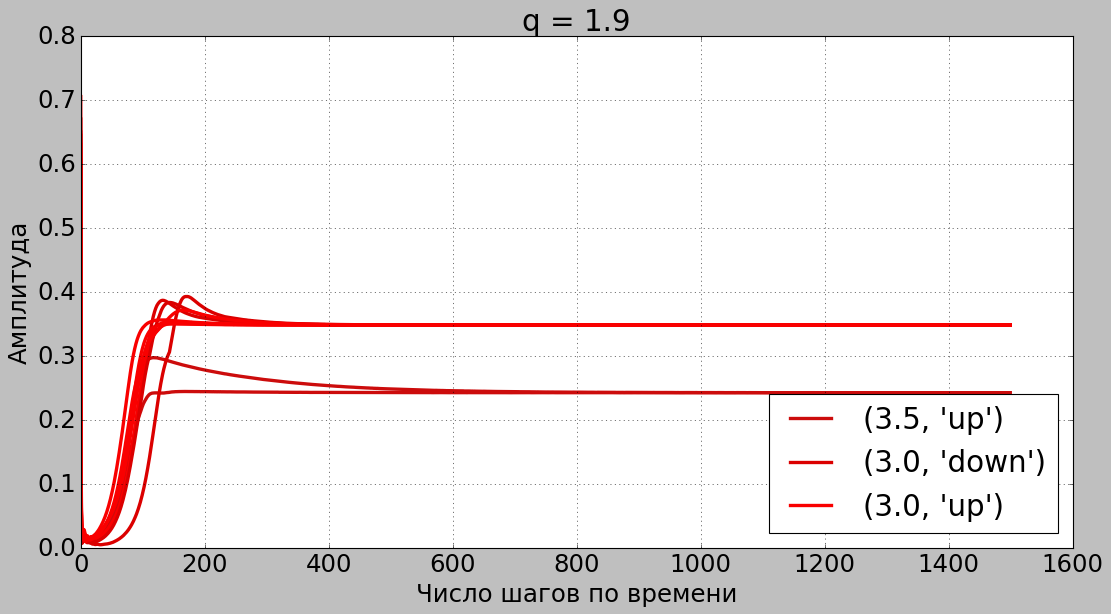

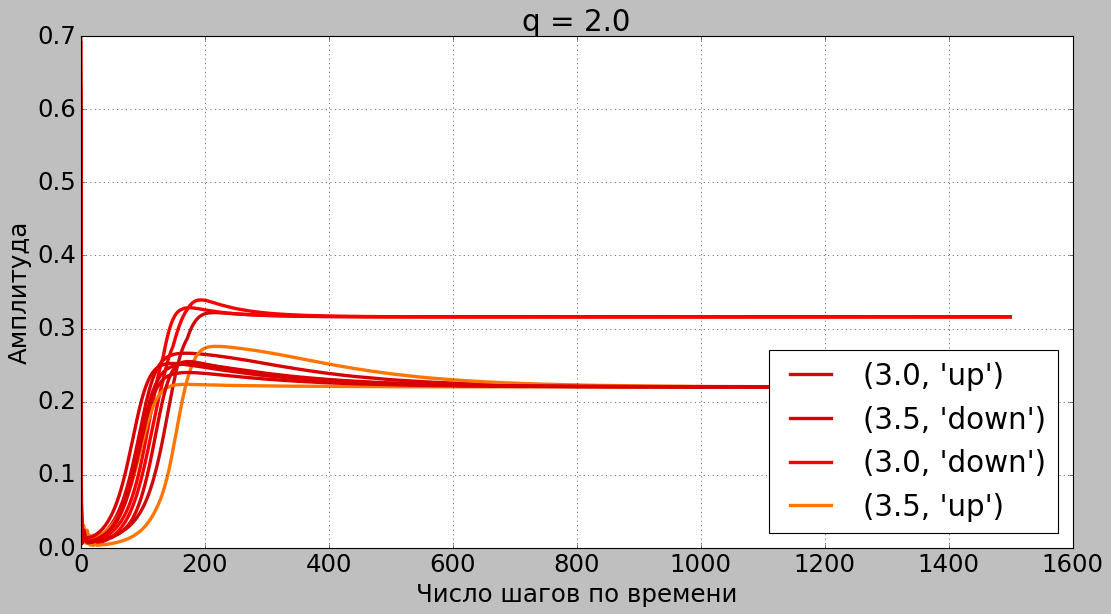

In [57]:
draw_amps_timelines(amps_rand,1500)

In [58]:
def draw_boxplot(amps_):   
    arr = []
    for q in amps_:
        for tr,patt in amps_[q]:
            arr.append([q, tr.max()])
    df = pd.DataFrame(arr,columns=['q','max_amp'])
    g = sns.boxplot(x="q", y="max_amp", data=df)
    sns.swarmplot(x="q", y="max_amp", data=df,ax=g,color='k')
    plt.show()

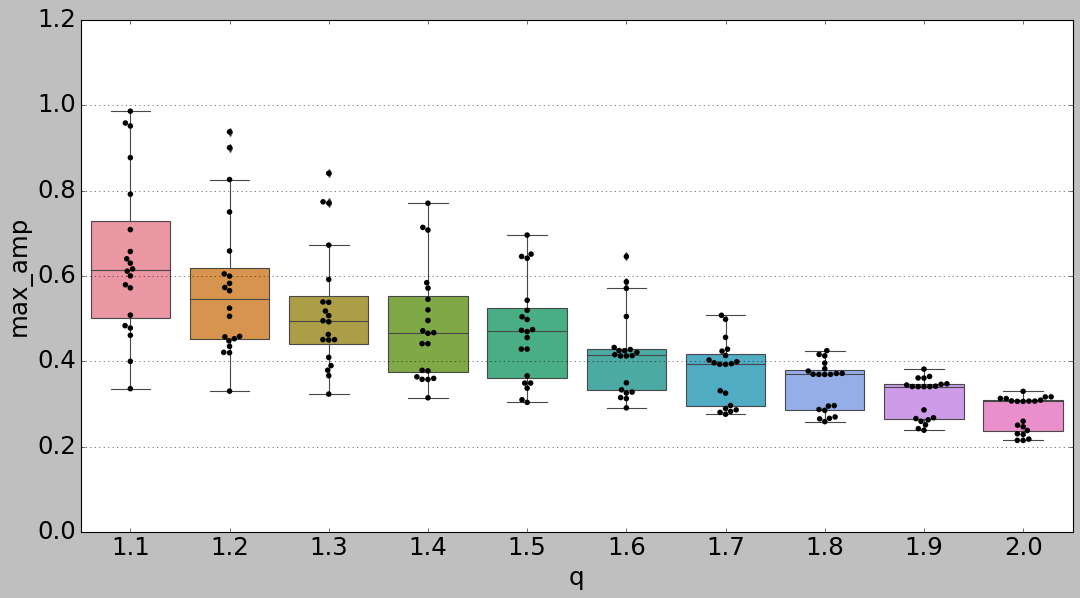

In [59]:
draw_boxplot(amps)

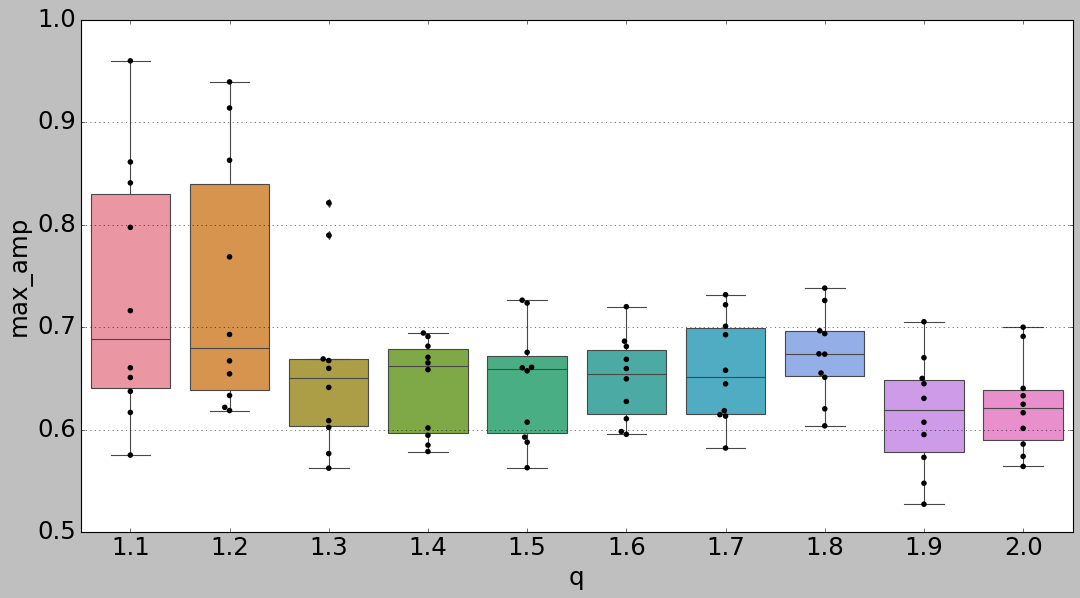

In [60]:
draw_boxplot(amps_rand)